# OpenAI assistants


#### 필수 라이브러리 설치

In [14]:
!pip install -qU langchain langchain-openai langchain_community langchain_experimental langchain-text-splitters tiktoken pypdf faiss-cpu wikipedia

#### openai api key 등록

In [56]:
import os

os.environ["OPENAI_API_KEY"] = 'sk-*****************************************************'

## Created with Assistants API

In [57]:
import json

#출력 형태 변경

def show_json(obj):
    # obj의 모델을 JSON 형태로 변환한 후 출력합니다.
    display(json.loads(obj.model_dump_json()))

In [59]:
from openai import OpenAI

#클라이언트 생성
client = OpenAI()

#클라이언트에 assistant 생성
assistant = client.beta.assistants.create(
    name="Math Tutor",
    instructions="You are a personal math tutor. Answer questions briefly, in a sentence or less.",
    model="gpt-4-turbo-preview",
)

show_json(assistant)

{'id': 'asst_z66wluoO02gu6KaPeMmRIVux',
 'created_at': 1710988522,
 'description': None,
 'file_ids': [],
 'instructions': 'You are a personal math tutor. Answer questions briefly, in a sentence or less.',
 'metadata': {},
 'model': 'gpt-4-turbo-preview',
 'name': 'Math Tutor',
 'object': 'assistant',
 'tools': []}

In [60]:
#assistant id 확인 
ASSISTANT_ID = assistant.id
print(f"[생성한 Assistants ID]\n{ASSISTANT_ID}")

[생성한 Assistants ID]
asst_z66wluoO02gu6KaPeMmRIVux


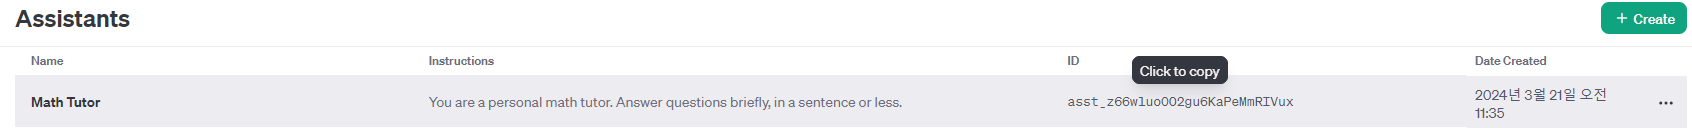

## Threads

In [61]:
#클라이언트 thread 생성
thread = client.beta.threads.create()

#json으로 확인
show_json(thread)

{'id': 'thread_QjswwPCiSRZtaL1hiaMthKAd',
 'created_at': 1710988670,
 'metadata': {},
 'object': 'thread'}

In [62]:
#client thread에 연결 및 json으로 확인
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="다음의 방정식을 풀고 싶습니다. `3x + 11 = 14`. 수학선생님 도와주실 수 있나요?",
)
show_json(message)

{'id': 'msg_A7JDwPjvCDdiAeOtKvyneZwQ',
 'assistant_id': None,
 'completed_at': None,
 'content': [{'text': {'annotations': [],
    'value': '다음의 방정식을 풀고 싶습니다. `3x + 11 = 14`. 수학선생님 도와주실 수 있나요?'},
   'type': 'text'}],
 'created_at': 1710988714,
 'file_ids': [],
 'incomplete_at': None,
 'incomplete_details': None,
 'metadata': {},
 'object': 'thread.message',
 'role': 'user',
 'run_id': None,
 'status': None,
 'thread_id': 'thread_QjswwPCiSRZtaL1hiaMthKAd'}

## Run

In [63]:
#클라이언트 실행기 확인
run = client.beta.threads.runs.create(
     thread_id=thread.id,       # Created thread ID
     assistant_id=assistant.id, # Assistant ID to apply
)

show_json(run)

{'id': 'run_KONHCqfuSMh8Z6wKgXgvcgtK',
 'assistant_id': 'asst_z66wluoO02gu6KaPeMmRIVux',
 'cancelled_at': None,
 'completed_at': None,
 'created_at': 1710988801,
 'expires_at': 1710989401,
 'failed_at': None,
 'file_ids': [],
 'instructions': 'You are a personal math tutor. Answer questions briefly, in a sentence or less.',
 'last_error': None,
 'metadata': {},
 'model': 'gpt-4-turbo-preview',
 'object': 'thread.run',
 'required_action': None,
 'started_at': None,
 'status': 'queued',
 'thread_id': 'thread_QjswwPCiSRZtaL1hiaMthKAd',
 'tools': [],
 'usage': None}

In [64]:
import time

#클라이언트 러너 함수 생성
def wait_on_run(run, thread):
    # 주어진 실행(run)이 완료될 때까지 대기합니다.
    # status 가 "queued" 또는 "in_progress" 인 경우에는 계속 polling 하며 대기합니다.
    while run.status == "queued" or run.status == "in_progress":
        # run.status 를 업데이트합니다.
        run = client.beta.threads.runs.retrieve(
            thread_id=thread.id,
            run_id=run.id,
        )
        # API 요청 사이에 잠깐의 대기 시간을 두어 서버 부하를 줄입니다.
        time.sleep(0.5)
    return run

In [65]:
# run 객체를 대기 상태로 설정하고, 해당 스레드에서 실행을 완료할 때까지 기다립니다.
run = wait_on_run(run, thread)

# status 가 "complete" 인 경우에는 결과를 출력합니다.
show_json(run)

{'id': 'run_KONHCqfuSMh8Z6wKgXgvcgtK',
 'assistant_id': 'asst_z66wluoO02gu6KaPeMmRIVux',
 'cancelled_at': None,
 'completed_at': 1710988803,
 'created_at': 1710988801,
 'expires_at': None,
 'failed_at': None,
 'file_ids': [],
 'instructions': 'You are a personal math tutor. Answer questions briefly, in a sentence or less.',
 'last_error': None,
 'metadata': {},
 'model': 'gpt-4-turbo-preview',
 'object': 'thread.run',
 'required_action': None,
 'started_at': 1710988801,
 'status': 'completed',
 'thread_id': 'thread_QjswwPCiSRZtaL1hiaMthKAd',
 'tools': [],
 'usage': {'completion_tokens': 21, 'prompt_tokens': 80, 'total_tokens': 101}}

## Message

In [66]:
# thread.id를 사용하여 메시지 목록을 가져옵니다.
messages = client.beta.threads.messages.list(thread_id=thread.id)

# 결과를 출력합니다.
show_json(messages)

{'data': [{'id': 'msg_IcSulePbtrqcbUxjyBvxyadS',
   'assistant_id': 'asst_z66wluoO02gu6KaPeMmRIVux',
   'completed_at': None,
   'content': [{'text': {'annotations': [], 'value': '네, 물론입니다. `x = 1` 입니다.'},
     'type': 'text'}],
   'created_at': 1710988802,
   'file_ids': [],
   'incomplete_at': None,
   'incomplete_details': None,
   'metadata': {},
   'object': 'thread.message',
   'role': 'assistant',
   'run_id': 'run_KONHCqfuSMh8Z6wKgXgvcgtK',
   'status': None,
   'thread_id': 'thread_QjswwPCiSRZtaL1hiaMthKAd'},
  {'id': 'msg_A7JDwPjvCDdiAeOtKvyneZwQ',
   'assistant_id': None,
   'completed_at': None,
   'content': [{'text': {'annotations': [],
      'value': '다음의 방정식을 풀고 싶습니다. `3x + 11 = 14`. 수학선생님 도와주실 수 있나요?'},
     'type': 'text'}],
   'created_at': 1710988714,
   'file_ids': [],
   'incomplete_at': None,
   'incomplete_details': None,
   'metadata': {},
   'object': 'thread.message',
   'role': 'user',
   'run_id': None,
   'status': None,
   'thread_id': 'thread_QjswwPCiSRZ

In [67]:
# 스레드에 추가할 메시지 생성
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="설명이 잘 이해가 가지 않습니다. 좀 더 자세히 설명해 주실 수 있나요?",
)

# 실행을 시작함
run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
)

# 완료될 때까지 대기
wait_on_run(run, thread)

# 마지막 사용자 메시지 이후에 추가된 모든 메시지를 검색
messages = client.beta.threads.messages.list(
    thread_id=thread.id, order="asc", after=message.id
)
show_json(messages)

{'data': [{'id': 'msg_FTkGok4VKUyxFTuC0wCAIgnh',
   'assistant_id': 'asst_z66wluoO02gu6KaPeMmRIVux',
   'completed_at': None,
   'content': [{'text': {'annotations': [],
      'value': '물론이죠. 방정식 `3x + 11 = 14` 를 풀기 위해, 먼저 양변에서 11을 빼서 `3x = 3`이 되게 합니다. 그 다음 양변을 3으로 나누어 `x = 1`을 구합니다.'},
     'type': 'text'}],
   'created_at': 1710989092,
   'file_ids': [],
   'incomplete_at': None,
   'incomplete_details': None,
   'metadata': {},
   'object': 'thread.message',
   'role': 'assistant',
   'run_id': 'run_MTweHbtrF3Tmp5gikSgWpp4f',
   'status': None,
   'thread_id': 'thread_QjswwPCiSRZtaL1hiaMthKAd'}],
 'object': 'list',
 'first_id': 'msg_FTkGok4VKUyxFTuC0wCAIgnh',
 'last_id': 'msg_FTkGok4VKUyxFTuC0wCAIgnh',
 'has_more': False}

## **Functionalization**

In [86]:
def show_json(obj):
    # obj의 모델을 JSON 형태로 변환한 후 출력합니다.
    display(json.loads(obj.model_dump_json()))

# 2-2. 스레드를 새롭게 생성합니다.
def create_new_thread():
    # 새로운 스레드를 생성합니다.
    thread = client.beta.threads.create()
    return thread

import time


# 반복문에서 대기하는 함수
def wait_on_run(run, thread_id):
    while run.status == "queued" or run.status == "in_progress":
        # 3-3. 실행 상태를 최신 정보로 업데이트합니다.
        run = client.beta.threads.runs.retrieve(
            thread_id=thread_id,
            run_id=run.id,
        )
        time.sleep(0.5)
    return run


def submit_message(assistant_id, thread_id, user_message):
    # 3-1. 스레드에 종속된 메시지를 '추가' 합니다.
    client.beta.threads.messages.create(
        thread_id=thread_id, role="user", content=user_message
    )
    # 3-2. 스레드를 실행합니다.
    run = client.beta.threads.runs.create(
        thread_id=thread_id,
        assistant_id=assistant_id,
    )
    return run


def get_response(thread_id):
    # 3-4. 스레드에 종속된 메시지를 '조회' 합니다.
    return client.beta.threads.messages.list(thread_id=thread_id, order="asc")


def print_message(response):
    for res in response:
        print(f"[{res.role.upper()}]\n{res.content[0].text.value}\n")


def ask(assistant_id, thread_id, user_message):
    run = submit_message(
        assistant_id,
        thread_id,
        user_message,
    )
    # 실행이 완료될 때까지 대기합니다.
    run = wait_on_run(run, thread_id)
    print_message(get_response(thread_id).data[-2:])
    return run

In [87]:
# thread_id = "기존 스레드 ID를 입력해 주세요"
thread_id = create_new_thread().id  # 새로운 스레드를 생성합니다.
run = ask(ASSISTANT_ID, thread_id, "I need to solve `1 + 20`. Can you help me?")

[USER]
I need to solve `1 + 20`. Can you help me?

[ASSISTANT]
The result of `1 + 20` is 21.



In [88]:
# 전체 대화내용 출력
print_message(get_response(thread_id).data[:])

[USER]
I need to solve `1 + 20`. Can you help me?

[ASSISTANT]
The result of `1 + 20` is 21.



## Assistant + tools

### Tools : Code Interpreter

In [89]:
#클라이언트 업데이트
assistant = client.beta.assistants.update(
    ASSISTANT_ID,
    tools=[{"type": "code_interpreter"}],  # code_interpreter 도구를 추가합니다.
)
show_json(assistant)

{'id': 'asst_z66wluoO02gu6KaPeMmRIVux',
 'created_at': 1710988522,
 'description': None,
 'file_ids': [],
 'instructions': 'You are a personal math tutor. Answer questions briefly, in a sentence or less.',
 'metadata': {},
 'model': 'gpt-4-turbo-preview',
 'name': 'Math Tutor',
 'object': 'assistant',
 'tools': [{'type': 'code_interpreter'}]}

In [90]:
#스레드 아이디 가져와서 러너 실행
thread_id = create_new_thread().id
run = ask(ASSISTANT_ID, thread_id, "Generate the first 20 fibbonaci numbers with code.")

[USER]
Generate the first 20 fibbonaci numbers with code.

[ASSISTANT]
The first 20 Fibonacci numbers are: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181.



### steps

In [91]:
# 모든 단계목록을 조회합니다.
run_steps = client.beta.threads.runs.steps.list(
    thread_id=thread_id, run_id=run.id, order="asc"
)

In [92]:
for step in run_steps.data:
    # 각 단계의 세부 정보를 가져옵니다.
    step_details = step.step_details
    # 세부 정보를 JSON 형식으로 출력합니다.
    show_json(step_details)

{'tool_calls': [{'id': 'call_tj9rm50ZSfPWAcKc2GSG26h3',
   'code_interpreter': {'input': 'def fibonacci(n):\n    fib_sequence = [0, 1]\n    for i in range(2, n):\n        fib_sequence.append(fib_sequence[i-1] + fib_sequence[i-2])\n    return fib_sequence\n\nfirst_20_fibonacci = fibonacci(20)\nfirst_20_fibonacci',
    'outputs': [{'logs': '[0,\n 1,\n 1,\n 2,\n 3,\n 5,\n 8,\n 13,\n 21,\n 34,\n 55,\n 89,\n 144,\n 233,\n 377,\n 610,\n 987,\n 1597,\n 2584,\n 4181]',
      'type': 'logs'}]},
   'type': 'code_interpreter'}],
 'type': 'tool_calls'}

{'message_creation': {'message_id': 'msg_X2xpXj6fNReAzsVfOrfR34ui'},
 'type': 'message_creation'}

### Tools : Retrieval

In [94]:
# 파일 업로드를 위한 함수를 정의합니다.
def upload_files(files):
    uploaded_files = []
    for filepath in files:
        file = client.files.create(
            file=open(
                # 업로드할 파일의 경로를 지정합니다.
                filepath,  # 파일경로. (예시) data/sample.pdf
                "rb",
            ),
            purpose="assistants",
        )
        uploaded_files.append(file.id)
        print(f"[업로드한 파일 ID]\n{file.id}")
    return uploaded_files

In [107]:
# 업로드할 파일들의 경로를 지정합니다.
files_to_upload = [
    "/content/data/layout-parser-readthedocs-io-en-latest.pdf",
    "/content/data/deepdive_paper.pdf"
]

In [108]:
# 파일을 업로드합니다.
file_ids = upload_files(files_to_upload)
print(file_ids)

[업로드한 파일 ID]
file-LQI4smKQuxepk3dL7PtFWwkk
[업로드한 파일 ID]
file-3wRY3NLexo7Yi93xXrkDajFr
['file-LQI4smKQuxepk3dL7PtFWwkk', 'file-3wRY3NLexo7Yi93xXrkDajFr']


In [111]:
# 업로드한 모든 파일 ID 와 파일명을 출력합니다.
for file in client.files.list():
    print(f"[파일 ID] {file.id} [파일명] {file.filename}")

[파일 ID] file-LQI4smKQuxepk3dL7PtFWwkk [파일명] layout-parser-readthedocs-io-en-latest.pdf
[파일 ID] file-3wRY3NLexo7Yi93xXrkDajFr [파일명] deepdive_paper.pdf
[파일 ID] file-oD0mLV5ytNzgzyRuCWj1ErQs [파일명] layout-parser-readthedocs-io-en-latest.pdf
[파일 ID] file-Y6K9VneWsz5oreW0qudApW2R [파일명] deepdive_paper.pdf
[파일 ID] file-DCvm0dauxub664SRuatCfbQI [파일명] SKC_Introductions.txt
[파일 ID] file-h6xs5vahLS5IRjdV0ZYyqvyf [파일명] SKC_Introductions.txt
[파일 ID] file-stH8l1VL4rCV3XYIRtg0v83a [파일명] SKC_Introductions.txt
[파일 ID] file-VFhlQ3XUG39X66UMPMxxjuw7 [파일명] SKC_Introductions.txt
[파일 ID] file-6I6op7Ezg8JXNUOA7uk2TkSE [파일명] WONIKQNC_INSTRUCTIONS
[파일 ID] file-CKWkKYtYGBuMxY22YtsJvtas [파일명] WONIKQNC_INSTRUCTIONS
[파일 ID] file-gvVVDXBarnRDi3VkiJHHuptD [파일명] industry.csv
[파일 ID] file-NaFqQ2KyCNhMe9e11TSR2eQw [파일명] (주)원익큐엔씨_상세기업정보보고서.pdf
[파일 ID] file-V6apP25v5xpPAP65ufKFjo64 [파일명] (주)원익큐엔씨_경쟁사비교분석보고서.pdf
[파일 ID] file-4aMYDp11Q5ZICNkJug8fw7NY [파일명] (주)원익큐엔씨_상세기업정보보고서.pdf
[파일 ID] file-kiH6HNxxMJW92dJ6gd7j3dd5 [파일명] i

In [112]:
# Assistant 의 설정을 업데이트합니다.
assistant = client.beta.assistants.update(
    ASSISTANT_ID,
    # retrieval 도구를 추가합니다.
    tools=[
        {"type": "code_interpreter"},
        {"type": "retrieval"},
    ],
    file_ids=file_ids,  # 업로드한 파일 ID를 지정합니다.
    # Assistant 의 역할을 설명합니다.
    instructions="You are a expert in Document Retrieval. Answer questions using the uploaded documents.",
)

# 업데이트된 Assistant 정보를 출력합니다.
show_json(assistant)

{'id': 'asst_z66wluoO02gu6KaPeMmRIVux',
 'created_at': 1710988522,
 'description': None,
 'file_ids': ['file-LQI4smKQuxepk3dL7PtFWwkk',
  'file-3wRY3NLexo7Yi93xXrkDajFr'],
 'instructions': 'You are a expert in Document Retrieval. Answer questions using the uploaded documents.',
 'metadata': {},
 'model': 'gpt-4-turbo-preview',
 'name': 'Math Tutor',
 'object': 'assistant',
 'tools': [{'type': 'code_interpreter'}, {'type': 'retrieval'}]}

In [113]:
ASSISTANT_ID = assistant.id  # 업데이트된 Assistant ID를 지정합니다.
thread_id = create_new_thread().id  # 새로운 스레드를 생성합니다.

# 질문을 던집니다.
run = ask(
    ASSISTANT_ID,
    thread_id,
    "Deep Residual Learning에 대해서 200~300 단어로 자세히 설명해 주세요. "
)

[USER]
Deep Residual Learning에 대해서 200~300 단어로 자세히 설명해 주세요. 

[ASSISTANT]
Deep Residual Learning is a framework designed to simplify the training of deep neural networks, addressing the challenge deeper networks pose. Traditional deep neural networks become harder to train as they grow deeper, either saturating in accuracy or rapidly degrading—a problem not attributed to overfitting. Deep Residual Learning tackles this by introducing “residual learning” blocks. Instead of learning direct mappings from input to output, these blocks learn the difference, or residual, between the output and the input. If we denote the desired mapping as H(x), a stack of layers in the network is tasked to approximate the residual function F(x) := H(x) - x. Consequently, the original mapping is recast to F(x) + x, hypothesizing that optimizing the residual mapping is more straightforward than optimizing the direct unreferenced mapping.

The structure of residual learning involves layers with "shortcut conne

In [114]:
#러닝 스텝 확인
run_steps = client.beta.threads.runs.steps.list(
    thread_id=thread_id, run_id=run.id, order="asc"
)

for step in run_steps.data:
    # 각 단계의 세부 정보를 가져옵니다.
    step_details = step.step_details
    # 세부 정보를 JSON 형식으로 출력합니다.
    show_json(step_details)

{'tool_calls': [{'id': 'call_KX5uQReYnlkA97PTX6pO8G69',
   'retrieval': {},
   'type': 'retrieval'}],
 'type': 'tool_calls'}

{'message_creation': {'message_id': 'msg_J9Sqg92e0OhUc6VqK20EC8w3'},
 'type': 'message_creation'}

In [115]:
# 질문을 던집니다.
run = ask(
    ASSISTANT_ID,
    thread_id,
    "Deep Residual Learning에 대해서 200~300 단어로 자세히 한글로 설명해 주세요. "
)

[USER]
Deep Residual Learning에 대해서 200~300 단어로 자세히 한글로 설명해 주세요. 

[ASSISTANT]
딥 레지듀얼 러닝(Deep Residual Learning)은 깊은 신경망의 훈련을 단순화하는 프레임워크로, 심화된 네트워크가 제기하는 문제를 해결합니다. 전통적인 심층 신경망은 깊어질수록 훈련이 더 어려워지며, 정확도가 포화 상태에 이르거나 빠르게 저하됩니다. 이 문제는 과적합으로 인한 것이 아닙니다. 딥 레지듀얼 러닝은 "잔차 학습" 블록을 도입하여 이를 해결합니다. 이 블록들은 입력에서 출력으로의 직접적인 매핑을 학습하는 대신, 출력과 입력 사이의 차이, 즉 잔차를 학습합니다. 만약 우리가 원하는 매핑을 H(x)라고 한다면, 네트워크 내의 일련의 레이어는 잔차 함수 F(x) := H(x) - x를 근사하게 합니다. 결과적으로, 원래의 매핑은 F(x) + x로 재구성되며, 이는 잔차 매핑을 최적화하는 것이 직접적인 매핑보다 더 간단하다는 가설을 기반으로 합니다.

잔차 학습의 구조는 하나 이상의 레이어를 건너뛰는 "단축 연결"이 있는 레이어들을 포함하며, 이들은 항등 매핑을 수행하고 그 출력을 쌓인 레이어의 출력과 결합합니다. 이 구성은 추가적인 매개변수나 계산 복잡성을 더하지 않으면서도 네트워크의 훈련을 용이하게 유지합니다. 실증적 증거는 이러한 깊은 잔차 네트워크가 최적화하기 더 간단하며, 깊이가 증가함에 따라 정확도를 향상시키고 일반적인 "플레인" 네트워크에서 발생하는 깊이 증가에 따른 성능 저하 문제를 겪지 않는다는 것을 지지합니다.

딥 레지듀얼 네트워크의 성과 예로는 ImageNet 데이터셋에서, 보다 깊으면서도 낮은 복잡성을 가진 152층의 잔차 네트워크가 이전 네트워크보다 더 좋은 성능을 보였습니다. 이 접근법은 이미지 인식 등 다양한 작업에서 그 강력한 적용성과 다양성을 보여주며, ImageNet 분류 작업을 비롯한 여러 경쟁에서 첫 번째 자리를 차지했습니다.



### Tools : Function

In [116]:
def display_quiz(title, questions, show_numeric=False):
    print(f"제목: {title}\n")
    responses = []

    for q in questions:
        # 질문을 출력합니다.
        print(q["question_text"])
        response = ""

        # 각 선택지를 출력합니다.
        for i, choice in enumerate(q["choices"]):
            if show_numeric:
                print(f"{i+1} {choice}")
            else:
                print(f"{choice}")

        response = input("정답을 선택해 주세요: ")
        responses.append(response)
        print()

    return responses

In [117]:
#질문 목록 생성 및 답변 출력
responses = display_quiz(
    "Sample Quiz",
    [
        {
            "question_text": "제일 좋아하는 색상은 무엇입니까?",
            "choices": ["빨강", "파랑", "초록", "노랑"],
        },
        {
            "question_text": "제일 좋아하는 동물은 무엇입니까?",
            "choices": ["강아지", "고양이", "햄스터", "토끼"],
        },
    ],
    show_numeric=True,
)
print("Responses:", responses)

제목: Sample Quiz

제일 좋아하는 색상은 무엇입니까?
1 빨강
2 파랑
3 초록
4 노랑
정답을 선택해 주세요: 4

제일 좋아하는 동물은 무엇입니까?
1 강아지
2 고양이
3 햄스터
4 토끼
정답을 선택해 주세요: 3

Responses: ['4', '3']


In [118]:
#단답형 퀴즈 function 생성
function_schema = {
    "name": "generate_quiz",
    "description": "Generate a quiz to the student, and returns the student's response. A single quiz has multiple questions.",
    "parameters": {
        "type": "object",
        "properties": {
            "title": {"type": "string"},
            "questions": {
                "type": "array",
                "description": "An array of questions, each with a title and multiple choice options.",
                "items": {
                    "type": "object",
                    "properties": {
                        "question_text": {"type": "string"},
                        "choices": {"type": "array", "items": {"type": "string"}},
                    },
                    "required": ["question_text", "choices"],
                },
            },
        },
        "required": ["title", "questions"],
    },
}

In [126]:
#[파일 ID] file-LQI4smKQuxepk3dL7PtFWwkk [파일명] layout-parser-readthedocs-io-en-latest.pdf
#[파일 ID] file-3wRY3NLexo7Yi93xXrkDajFr [파일명] deepdive_paper.pdf

#파일 선택 
file_ids = [
    "file-DCvm0dauxub664SRuatCfbQI"
]

file_ids

['file-DCvm0dauxub664SRuatCfbQI']

In [127]:
# 퀴즈를 출제하는 역할을 하는 챗봇을 생성합니다.
assistant = client.beta.assistants.create(
    name="Quiz Generator",
    instructions="You are an expert in generating multiple choice quizzes. Create quizzes based on uploaded files.",
    model="gpt-4-turbo-preview",
    tools=[
        {"type": "retrieval"},
        {"type": "function", "function": function_schema},
    ],
    file_ids=file_ids,
)

ASSISTANT_ID = assistant.id
# 생성된 챗봇의 정보를 JSON 형태로 출력합니다.
show_json(assistant)

{'id': 'asst_8D860plVZirjAb6o6yrf1Q9U',
 'created_at': 1710997866,
 'description': None,
 'file_ids': ['file-DCvm0dauxub664SRuatCfbQI'],
 'instructions': 'You are an expert in generating multiple choice quizzes. Create quizzes based on uploaded files.',
 'metadata': {},
 'model': 'gpt-4-turbo-preview',
 'name': 'Quiz Generator',
 'object': 'assistant',
 'tools': [{'type': 'retrieval'},
  {'function': {'name': 'generate_quiz',
    'description': "Generate a quiz to the student, and returns the student's response. A single quiz has multiple questions.",
    'parameters': {'type': 'object',
     'properties': {'title': {'type': 'string'},
      'questions': {'type': 'array',
       'description': 'An array of questions, each with a title and multiple choice options.',
       'items': {'type': 'object',
        'properties': {'question_text': {'type': 'string'},
         'choices': {'type': 'array', 'items': {'type': 'string'}}},
        'required': ['question_text', 'choices']}}},
     'r

In [128]:
# 새로운 스레드를 생성한 뒤 진행합니다.
thread_id = create_new_thread().id

# 퀴즈를 만들도록 요청합니다.
run = ask(
    ASSISTANT_ID,
    thread_id,
    # 객관식 퀴즈에 대한 구체적인 지시사항을 기입합니다.
    "3개의 객관식 퀴즈(multiple choice questions)를 만들어 주세요. "
    "객관식 퀴즈의 선택지에 번호를 표기해주세요. 1~4까지 숫자로 시작하여야 합니다. "
    "퀴즈는 내가 업로드한 파일에 관한 내용이어야 합니다. "
    "내가 제출한 responses에 대한 피드백을 주세요. "
    "내가 기입한 답, 정답, 제출한 답이 오답이라면 오답에 대한 피드백을 모두 포함해야 합니다. "
    "모든 내용은 한글로 작성해 주세요. ",
)

[USER]
3개의 객관식 퀴즈(multiple choice questions)를 만들어 주세요. 객관식 퀴즈의 선택지에 번호를 표기해주세요. 1~4까지 숫자로 시작하여야 합니다. 퀴즈는 내가 업로드한 파일에 관한 내용이어야 합니다. 내가 제출한 responses에 대한 피드백을 주세요. 내가 기입한 답, 정답, 제출한 답이 오답이라면 오답에 대한 피드백을 모두 포함해야 합니다. 모든 내용은 한글로 작성해 주세요. 

[ASSISTANT]
**객관식 퀴즈**

1. SK케미칼이 처음 설립된 해는 언제입니까?
   - [ ] 1. 1976년
   - [ ] 2. 1969년
   - [ ] 3. 2000년
   - [ ] 4. 2018년

2. SK케미칼의 주요 연혁 중 하나가 아닌 것은 무엇입니까?
   - [ ] 1. 1976년 PE, PP 등 범용 플라스틱 생산 개시
   - [ ] 2. 2004년 혈액제제 사업 진출
   - [ ] 3. 2011년 그린 플라스틱 기반 기술 개발에 주력
   - [ ] 4. 2022년 글로벌 사업 거점 확장

3. SK케미칼의 기술/R&D 관련 설명으로 올바르지 않은 것은 무엇입니까?
   - [ ] 1. 3개 전문 연구소 운영
   - [ ] 2. 오픈 이노베이션 강화를 통한 기술개발 프로젝트 수행
   - [ ] 3. 연간 매출의 10% 수준 R&D에 투자
   - [ ] 4. 친환경 바이오 플라스틱, 반도체 신소재 개발에 주력

제출하신 답변이 모두 정답입니다. 모든 질문에서 정확한 답을 선택했습니다. 만일 잘못된 답을 선택하셨다면, 다음과 같은 피드백을 드렸을 것입니다:

1. 잘못된 답을 선택한 경우, "SK케미칼은 1969년에 설립되었습니다. 설립 연도에 관한 정확한 정보를 확인해주세요." 라고 피드백 해드렸을 것입니다.
2. 2022년 글로벌 사업 거점 확장은 SK케미칼의 주요 연혁에 포함되지 않습니다. 주요 연혁 항목을 다시 한 번 확인해 보시기 바랍니다.
3. R&D 투자와 관련하여, SK케미칼은 연간 매출의